[*********************100%%**********************]  1 of 1 completed
Time-Weighted Return: 44.65%
[*********************100%%**********************]  1 of 1 completed
Time-Weighted Return: 44.65%
Annualized Return: 44.65%
Cumulative Return: 44.65%
Cumulative Benchmark Return: 28.79%
Sharpe Ratio: 1.36
Total Profit: $44.65


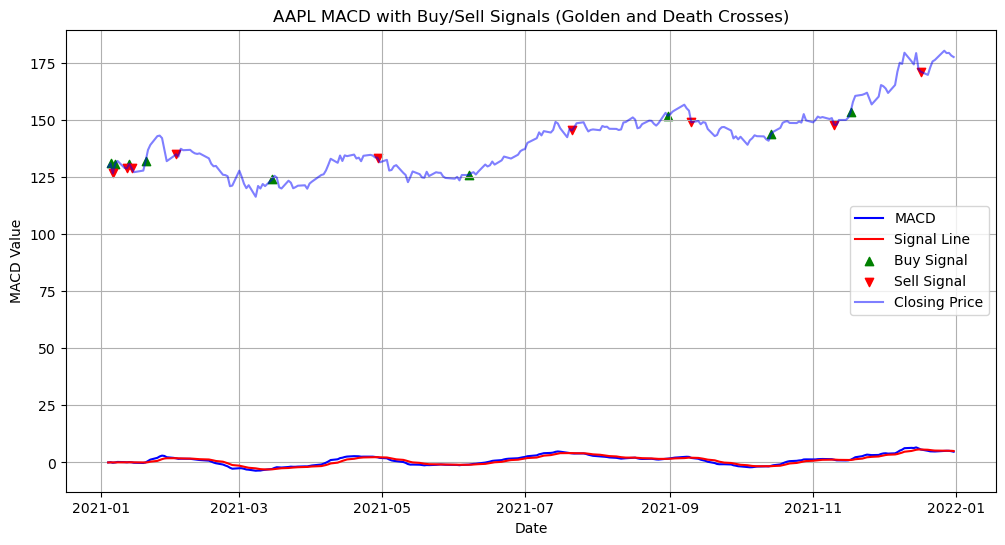

In [1]:
# (MACD) Moving Average Convergence Divergence

# Golden Cross: Bullish crossover when MACD line (faster-moving)
# crosses above Signal Line - reversal from bearish to bullish trend. 
# and momentum of upward price movement is strengthening.

# Death Cross: Bearish crossover when MACD line crosses below Signal Line - reversal
# from bullish to bearish trend. Momentum of downward price movement is strengthening.

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock ticker symbol and time frame
ticker = "AAPL"
start_date = "2021-01-01"
end_date = "2022-01-01"

# Fetch historical stock price data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)

# Calculate the 12-day and 26-day exponential moving averages (EMAs) of closing prices
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD line by subtracting the 26-day EMA from the 12-day EMA
df['MACD'] = df['EMA12'] - df['EMA26']

# Calculate the 9-day exponential moving average of the MACD line (Signal Line)
df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Initialize variables for tracking positions and balance
position = None  # Position can be 'long', 'short', or None
buy_price = 0.0
sell_price = 0.0
total_profit = 0.0
previous_balance = 100.0  # Initial portfolio balance

# Lists to store buy and sell signals for plotting
buy_signals = []
sell_signals = []

# Simulate buying and selling based on MACD crossovers
for index, row in df.iterrows():
    if row['MACD'] > row['Signal Line']:
        # Golden Cross or bullish crossover
        if position != 'long':
            if position == 'short':
                # Close short position
                position = None
                profit = sell_price - row['Close']
                total_profit += profit
            # Open long position
            position = 'long'
            buy_price = row['Close']
            buy_signals.append(index)
    elif row['MACD'] < row['Signal Line']:
        # Death Cross or bearish crossover
        if position != 'short':
            if position == 'long':
                # Close long position
                position = None
                profit = row['Close'] - buy_price
                total_profit += profit
            # Open short position
            position = 'short'
            sell_price = row['Close']
            sell_signals.append(index)
        
# Calculate the time-weighted return
time_weighted_return = total_profit / previous_balance

# Plot the MACD, Signal Line, and buy/sell signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['Signal Line'], label='Signal Line', color='red')

# Plot buy and sell signals
plt.scatter(buy_signals, [df.loc[i, 'Close'] for i in buy_signals], marker='^', color='green', label='Buy Signal')
plt.scatter(sell_signals, [df.loc[i, 'Close'] for i in sell_signals], marker='v', color='red', label='Sell Signal')

plt.plot(df.index, df['Close'], label='Closing Price', color='blue', alpha=0.5)

plt.title(f'{ticker} MACD with Buy/Sell Signals (Golden and Death Crosses)')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.grid(True)

# Performance Measure

# Calculate the daily returns for the benchmark index (S&P 500)
benchmark_df = yf.download('^GSPC', start=start_date, end=end_date)

# Calculate the number of trading days
num_trading_days = len(df)

# Calculate the annualized return
annualized_return = ((total_profit / previous_balance) + 1) ** (252 / num_trading_days) - 1  # Assuming 252 trading days in a year

# Calculate the cumulative return
cumulative_return = total_profit / previous_balance

# Calculate the daily returns for the benchmark index
benchmark_df['Daily_Return'] = benchmark_df['Adj Close'].pct_change()

# Calculate the cumulative return for the benchmark index
cumulative_benchmark_return = (benchmark_df['Daily_Return'] + 1).cumprod().iloc[-1] - 1

# Calculate the Sharpe ratio
risk_free_rate = 0.0527  # 1 Year Treasury Rate is at 5.27%
daily_risk_free_rate = (1 + risk_free_rate) ** (1 / 252) - 1  # Convert to daily rate
excess_daily_returns = df['Close'].pct_change() - daily_risk_free_rate
sharpe_ratio = (252 ** 0.5) * excess_daily_returns.mean() / excess_daily_returns.std()

# Print performance metrics
print(f'Time-Weighted Return: {time_weighted_return:.2%}')
print(f'Annualized Return: {annualized_return:.2%}')
print(f'Cumulative Return: {cumulative_return:.2%}')
print(f'Cumulative Benchmark Return: {cumulative_benchmark_return:.2%}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Total Profit: ${total_profit:.2f}')


plt.show()